
# CS-324 Machine Learning CEP - CIFAR-10 Project
 
- **Abdul Wasy** (Roll No: CS22126)  




In [6]:

# Install Seaborn for advanced statistical data visualization
!pip install seaborn

# Install ipywidgets for interactive widgets in Jupyter Notebooks
!pip install ipywidgets

# Install OpenCV for image and video processing
!pip install opencv-python



# Import NumPy for numerical operations and array handling
import numpy as np

# Import Pandas for data manipulation and analysis using DataFrames
import pandas as pd

# Import Matplotlib's pyplot module for plotting and visualizing data
import matplotlib.pyplot as plt

# Import Seaborn for attractive and informative statistical graphics
import seaborn as sns

# Import train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import StandardScaler to normalize/standardize the feature data
from sklearn.preprocessing import StandardScaler

# Import metrics to evaluate classification models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import SGDClassifier for linear classification using stochastic gradient descent
from sklearn.linear_model import SGDClassifier

# Import KNeighborsClassifier for K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

# Import shuffle to randomly shuffle the dataset
from sklearn.utils import shuffle

# Import MobileNetV2 model (pretrained) from Keras Applications for transfer learning
from tensorflow.keras.applications import MobileNetV2

# Import Sequential and Model APIs for building neural networks
from tensorflow.keras.models import Sequential, Model

# Import layers used in the model such as Dense, GlobalAveragePooling2D, and Input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input

# Import the Adam optimizer for training deep learning models
from tensorflow.keras.optimizers import Adam

# Import to_categorical to convert integer labels into one-hot encoded format
from tensorflow.keras.utils import to_categorical

# Import the CIFAR-10 dataset, a standard image dataset of 60,000 32x32 color images in 10 classes
from tensorflow.keras.datasets import cifar10

# Import TensorFlow as the main deep learning framework
import tensorflow as tf

# Import ipywidgets to use UI components (like sliders, dropdowns) in Jupyter
import ipywidgets as widgets

# Import display function to render widgets and other rich outputs in Jupyter
from IPython.display import display

# Import OpenCV for computer vision tasks like reading and processing images
import cv2



In [7]:
# Load the CIFAR-10 dataset and split it into training and testing sets
# X_train and X_test contain the image data
# y_train and y_test contain the corresponding labels (class numbers)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten the label arrays from shape (n, 1) to shape (n,)
# This makes them 1D arrays, which are easier to work with in most ML models.  y_train and y_test contain the class labels (integers from 0 to 9).
#Many machine learning functions, especially from scikit-learn, expect 1D label arrays (like [0, 1, 2]) instead of 2D arrays (like [[0], [1], [2]]).
y_train, y_test = y_train.flatten(), y_test.flatten()


In [8]:
print(X_train.shape)  # (50000, 32, 32, 3)
print(y_train.shape)  # (50000, 1)


(50000, 32, 32, 3)
(50000,)


In [9]:
animal_classes = [2, 3, 4, 5, 6, 7]
vehicle_classes = [0, 1, 8, 9]
def map_label(label):
    return 0 if label in animal_classes else 1

y_train_bin = np.array([map_label(label) for label in y_train])
y_test_bin = np.array([map_label(label) for label in y_test])


In [10]:
print(y_train_bin)
print(y_test_bin)

[0 1 1 ... 1 1 1]
[0 1 1 ... 0 1 0]


In [11]:
# Convert the pixel values in X_train to float32 and normalize them to the range [0, 1]
X_train = X_train.astype('float32') / 255.0

# Do the same for X_test: convert to float32 and normalize to [0, 1]
X_test = X_test.astype('float32') / 255.0



In [12]:
print((X_train))
print(X_test)  

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [13]:
# Reshape X_train from (50000, 32, 32, 3) to (50000, 3072)
# This flattens each 32x32x3 image into a 1D vector of 3072 features (32*32*3)
X_train_flat = X_train.reshape((X_train.shape[0], -1))

# Do the same for X_test: reshape from (10000, 32, 32, 3) to (10000, 3072)
X_test_flat = X_test.reshape((X_test.shape[0], -1))



In [14]:
# Dictionary to store KNN accuracies for different values of k
knn_accuracies = {}

# Placeholder to store the best-performing KNN model (optional)
best_knn_model = None

# Loop over different values of k (number of neighbors)
for k in [3, 5, 7]:
    # Create a K-Nearest Neighbors model with k neighbors
    model = KNeighborsClassifier(n_neighbors=k)

    # Train the model on flattened image data
    model.fit(X_train_flat, y_train_bin)

    # Predict on test data
    preds = model.predict(X_test_flat)

    # Calculate accuracy
    acc = accuracy_score(y_test_bin, preds)

    # Save accuracy with identifier
    knn_accuracies[f'KNN_k={k}'] = acc

    # Save best model (optional: here when k=5)
    if k == 5:
        best_knn_model = model






In [15]:
# Dictionary to store SGD classifier accuracies
sgd_accuracies = {}

# Placeholder to store the best-performing SGD model
best_sgd_model = None

# Loop over different values of alpha (regularization strength)
for alpha in [0.0001, 0.001, 0.01]:
    # Create an SGDClassifier (a linear classifier using stochastic gradient descent)
    model = SGDClassifier(loss='log_loss', alpha=alpha, max_iter=1000, random_state=42)

    # Train the model
    model.fit(X_train_flat, y_train_bin)

    # Predict on test data
    preds = model.predict(X_test_flat)

    # Compute accuracy
    acc = accuracy_score(y_test_bin, preds)

    # Store accuracy
    sgd_accuracies[f'SGD_alpha={alpha}'] = acc

    # Save best model (optional: when alpha=0.0001)
    if alpha == 0.0001:
        best_sgd_model = model



In [16]:
# Dictionary to store CNN accuracies
cnn_accuracies = {}

# Function to build a transfer learning CNN using MobileNetV2 as base
def build_transfer_model(units=64):
    # Load MobileNetV2 without the top layer and with pretrained weights
    # Function to build a transfer learning CNN using MobileNetV2 as base
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

    # Freeze base model layers to prevent training them. 
    #Freezes all layers in MobileNetV2 so their weights won't be updated during training. This is common in transfer learning — we reuse the pretrained CNN as a fixed feature extractor.
    base_model.trainable = False

    # Add pooling and dense layers on top of the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(units, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)  # Binary classification

    # Create the full model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model with binary crossentropy loss and Adam optimizer
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Train and evaluate CNN with different units in the dense layer
for units in [64, 128, 256]:
    # Build the CNN model
    cnn_model = build_transfer_model(units)

    # Train the model on image data (not flattened)
    cnn_model.fit(X_train, y_train_bin, epochs=3, validation_data=(X_test, y_test_bin), verbose=0)

    # Evaluate the model on test set (accuracy is at index 1 of the returned list)
    acc = cnn_model.evaluate(X_test, y_test_bin, verbose=0)[1]

    # Store accuracy
    cnn_accuracies[f'CNN_units={units}'] = acc

C:\Users\User\AppData\Local\Temp\ipykernel_14056\3520820571.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_157']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\funct

In [17]:
split_results = {}
for ratio in [0.7, 0.8, 0.9]:
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train_flat, y_train_bin, test_size=1-ratio, random_state=42)
    model = SGDClassifier(loss='log_loss', alpha=0.0001, max_iter=1000)
    model.fit(X_train_sub, y_train_sub)
    acc = model.score(X_test_sub, y_test_sub)
    split_results[f'SGD_split={int(ratio*100)}%'] = acc


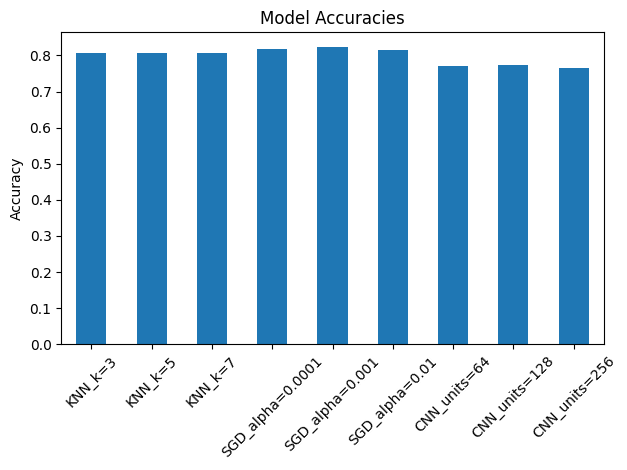

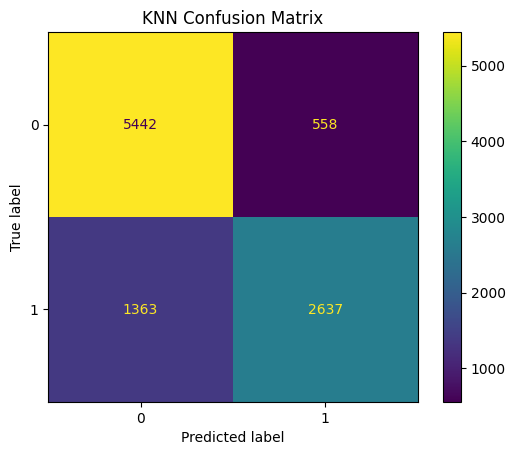

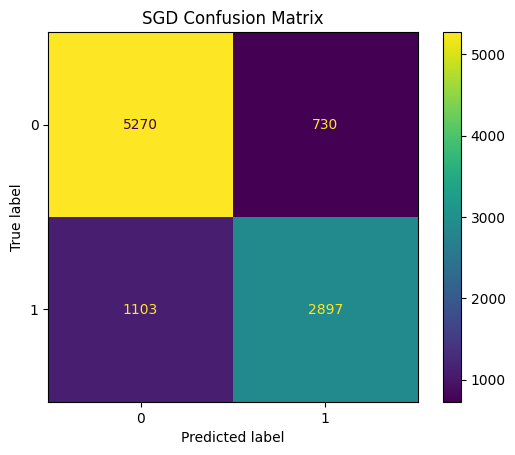


Data Split Analysis:
SGD_split=70%: 0.8159
SGD_split=80%: 0.7331
SGD_split=90%: 0.8138


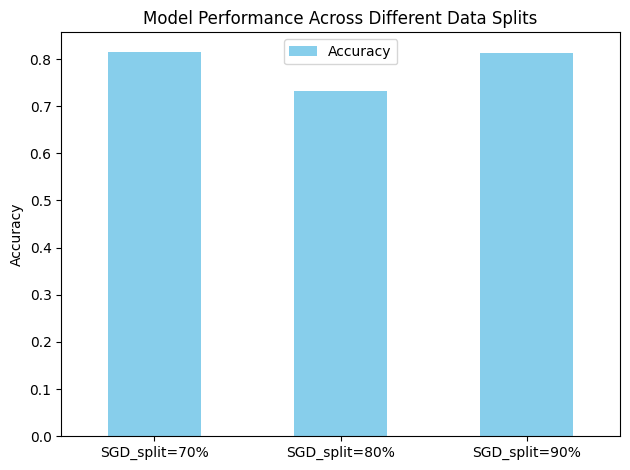

In [18]:
all_results = {**knn_accuracies, **sgd_accuracies, **cnn_accuracies}
pd.DataFrame.from_dict(all_results, orient='index', columns=['Accuracy']).plot(kind='bar', legend=False)
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add confusion matrices for better model comparison
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X, y, title):
    preds = model.predict(X)
    cm = confusion_matrix(y, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

plot_confusion_matrix(best_knn_model, X_test_flat, y_test_bin, "KNN Confusion Matrix")
plot_confusion_matrix(best_sgd_model, X_test_flat, y_test_bin, "SGD Confusion Matrix")



print("\nData Split Analysis:")
for key, val in split_results.items():
    print(f"{key}: {val:.4f}")

# Visualize how different splits affect performance
split_df = pd.DataFrame.from_dict(split_results, orient='index', columns=['Accuracy'])
split_df.plot(kind='bar', color='skyblue')
plt.title("Model Performance Across Different Data Splits")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


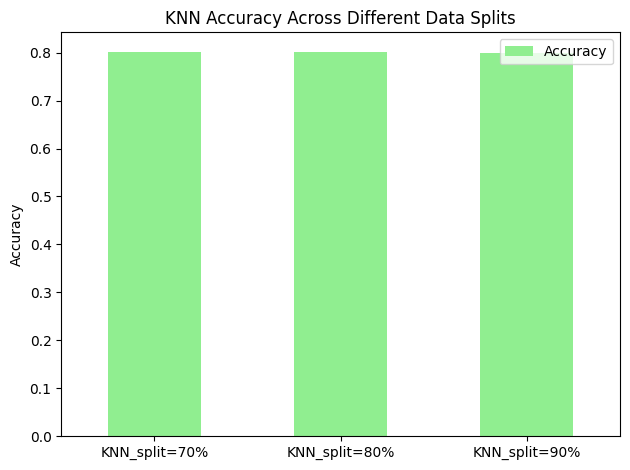

In [19]:
knn_split_results = {}
for ratio in [0.7, 0.8, 0.9]:
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
        X_train_flat, y_train_bin, test_size=1 - ratio, random_state=42
    )
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_sub, y_train_sub)
    acc = knn_model.score(X_test_sub, y_test_sub)
    knn_split_results[f'KNN_split={int(ratio*100)}%'] = acc

# Plotting results
knn_split_df = pd.DataFrame.from_dict(knn_split_results, orient='index', columns=['Accuracy'])
knn_split_df.plot(kind='bar', color='lightgreen')
plt.title("KNN Accuracy Across Different Data Splits")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14056\3520820571.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_471']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_628']
Received: inputs=Tensor(shape=(32, 32, 32, 3))
  warnings.warn(msg)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\fun

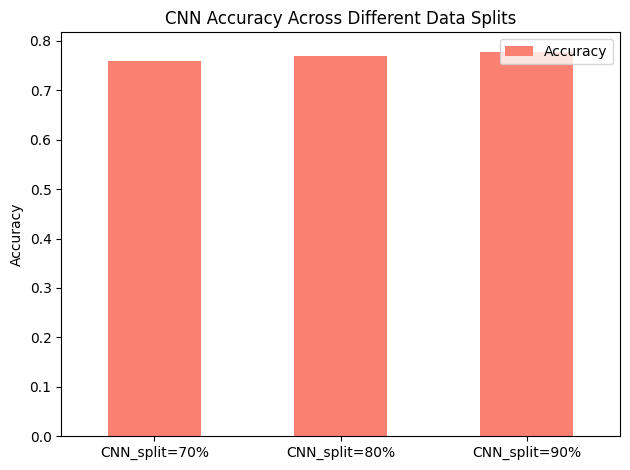

In [20]:
cnn_split_results = {}
for ratio in [0.7, 0.8, 0.9]:
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
        X_train, y_train_bin, test_size=1 - ratio, random_state=42
    )
    cnn_model = build_transfer_model(units=128)  # use consistent units
    cnn_model.fit(X_train_sub, y_train_sub, epochs=3, verbose=0)
    acc = cnn_model.evaluate(X_test_sub, y_test_sub, verbose=0)[1]
    cnn_split_results[f'CNN_split={int(ratio*100)}%'] = acc

# Plotting results
cnn_split_df = pd.DataFrame.from_dict(cnn_split_results, orient='index', columns=['Accuracy'])
cnn_split_df.plot(kind='bar', color='salmon')
plt.title("CNN Accuracy Across Different Data Splits")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Initial Accuracy: 0.7686, After Incremental Learning: 0.8119


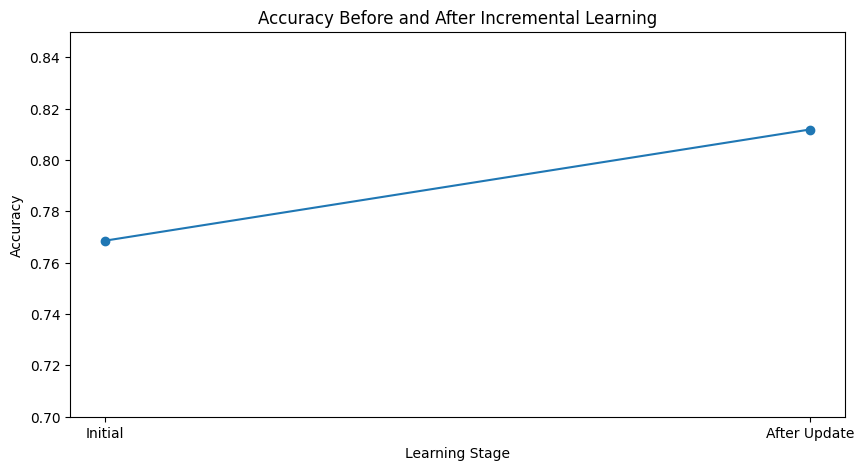

In [21]:
new_X, new_y = X_test_flat[:500], y_test_bin[:500]
incremental_model = SGDClassifier(loss='log_loss', alpha=0.0001, max_iter=1000)
incremental_model.fit(X_train_flat, y_train_bin)
initial_score = incremental_model.score(X_test_flat, y_test_bin)
incremental_model.partial_fit(new_X, new_y)
updated_score = incremental_model.score(X_test_flat, y_test_bin)
print(f"Initial Accuracy: {initial_score:.4f}, After Incremental Learning: {updated_score:.4f}")
# Add visualization of accuracy changes during incremental learning
plt.figure(figsize=(10, 5))
plt.plot([0, 1], [initial_score, updated_score], marker='o')
plt.title("Accuracy Before and After Incremental Learning")
plt.xlabel("Learning Stage")
plt.ylabel("Accuracy")
plt.xticks([0, 1], ["Initial", "After Update"])
plt.ylim(0.7, 0.85)
plt.show()


In [23]:
# Train and store models once
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_flat, y_train_bin)

sgd_model = SGDClassifier(loss='log_loss', alpha=0.0001, max_iter=1000)
sgd_model.fit(X_train_flat, y_train_bin)

cnn_ui_model = build_transfer_model(units=128)
cnn_ui_model.fit(X_train, y_train_bin, epochs=3, verbose=0)

# UI Widgets
upload = widgets.FileUpload(accept='.jpg,.png', multiple=False)
model_choice = widgets.Dropdown(options=['KNN (k=5)', 'SGD (alpha=0.0001)', 'CNN Transfer'], description='Model:')
predict_btn = widgets.Button(description="Predict")
output = widgets.Output()


def on_predict_clicked(b):
    with output:
        output.clear_output()
        try:
            if not upload.value:
                print("Please upload an image.")
                return
                
            # Corrected file access - works for both single and multiple upload cases
            uploaded_file = upload.value
            if isinstance(uploaded_file, dict):
                # Newer ipywidgets version
                img_data = next(iter(uploaded_file.values()))['content']
            else:
                # Older ipywidgets version
                img_data = uploaded_file[0]['content']
                
            np_arr = np.frombuffer(img_data, np.uint8)
            img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, (32, 32))
            img = img.astype('float32') / 255.0

            if model_choice.value.startswith('KNN'):
                pred = knn_model.predict([img.flatten()])[0]
                proba = knn_model.predict_proba([img.flatten()])[0]
            elif model_choice.value.startswith('SGD'):
                pred = sgd_model.predict([img.flatten()])[0]
                proba = sgd_model.predict_proba([img.flatten()])[0]
            else:
                pred_proba = cnn_ui_model.predict(img.reshape(1, 32, 32, 3))[0][0]
                pred = int(pred_proba >= 0.5)
                proba = [1-pred_proba, pred_proba]  # Convert to probability distribution
            
            label = "Animal" if pred == 0 else "Vehicle"
            confidence = max(proba)
            
            print(f"Predicted Label: {label} (Confidence: {confidence:.2%})")
            
            # Display the uploaded image
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
        except Exception as e:
            print(f"An error occurred: {str(e)}")


   

predict_btn.on_click(on_predict_clicked)
display(upload, model_choice, predict_btn, output)

C:\Users\User\AppData\Local\Temp\ipykernel_14056\3520820571.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1099']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


FileUpload(value=(), accept='.jpg,.png', description='Upload')

Dropdown(description='Model:', options=('KNN (k=5)', 'SGD (alpha=0.0001)', 'CNN Transfer'), value='KNN (k=5)')

Button(description='Predict', style=ButtonStyle())

Output()